## Task 1: Modify the code in [Notebook.ipynb](https://github.com/arewadataScience/ArewaDS-Machine-Learning/blob/main/1-Introduction/01-defining-data-science/notebook.ipynb) to find out related concepts for the fields of Big Data and Machine Learning


### Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data.

### Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some text mining. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Machine Learning and Data from DataCamp:

In [1]:
url = 'https://www.datacamp.com/blog/what-is-machine-learning'

### Step 1: Getting the Data

First step in every data science process is getting the data. We will use <mark>requests</mark> library to do that:

In [8]:
'''import requests

text = requests.get(url).content.decode('utf-8')
print(text)
'''



"import requests\n\ntext = requests.get(url).content.decode('utf-8')\nprint(text)\n"

Trying to use <mark>request</mark> on DataCamp, I keep getting blocked by <mark>Cloudflare's,</mark> anti-bot protection

I discovered the following:

- Python's <mark>requests</mark> library does not run JavaScript, so it can’t pass the browser challenges that Cloudflare requires.
- Cloudflare uses techniques like JavaScript challenges, CAPTCHA, or waiting pages to block automated access.

fix:
- using <mark>cloudscraper library</mark> (Recommended for simple Cloudflare pages)

In [2]:
import cloudscraper
scraper = cloudscraper.create_scraper()
response = scraper.get("https://www.datacamp.com/blog/what-is-machine-learning")
text = response.text
print(text[:1000])

<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><meta content="website" property="og:type"/><meta content="app-id=1263413087" name="apple-itunes-app"/><meta content="M-70jYcq5Hj35EY_NQzm9MAPI6pfVrq-hqaiK13ZQeo" name="google-site-verification"/><link href="/manifest.json" rel="manifest"/><link href="/users/sign_up" rel="preconnect"/><link href="https://compliance.datacamp.com" rel="preconnect"/><link href="/marketing-backgrounds/favicons/apple-touch-icon-57x57.png" rel="apple-touch-icon-precomposed" sizes="57x57"/><link href="/marketing-backgrounds/favicons/apple-touch-icon-114x114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/><link href="/marketing-backgrounds/favicons/apple-touch-icon-72x72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/><link href="/marketing-backgrounds/favicons/apple-touch-icon-144x144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/><link href="/marketing-backgrounds/favicons

### Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in HTMLParser object from Python. We need to subclass the HTMLParser class and define the code that will collect all text inside HTML tags, except <script> and <style> tags.

In [16]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

    What is Machine Learning? Definition, Types, Tools & More | DataCamp Skip to main content EN English Español Português Deutsch Beta Français Beta More Information Found an Error? blogs Blogs Tutorials docs Podcasts Cheat Sheets code-alongs Newsletter Category Category About DataCamp Latest news about our products and team Certification DataCamp Classrooms DataCamp Donates For Business Learner Stories Life at DataCamp Product News Category Technologies Discover content by tools and technology AI Agents Airflow Alteryx Artificial Intelligence AWS Azure Business Intelligence ChatGPT Databricks dbt Docker Excel Flink Generative AI Git Google Cloud Platform Hadoop Java Julia Kafka Kubernetes Large Language Models MongoDB MySQL NoSQL OpenAI PostgreSQL Power BI PySpark Python R Scala Snowflake Spreadsheets SQL Tableau Category Topics Discover content by data science topics AI for Business Big Data Career Services Cloud Data Analysis Data Engineering Data Governance Data Literacy Data Scie

### Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called *RAKE* for keyword extraction. First, let's install this library in case it is not present:

In [17]:
!pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b803f7984945957ae419b0d5f0775c1472e7ed14d4bc8ea813f2ad4b5d992e33
  Stored in directory: /home/salim/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)[:51]
res

[('artificial intelligence', 4.0),
 ('fraud detection', 4.0),
 ('decision trees', 4.0),
 ('neural networks', 4.0),
 ('unseen data', 4.0),
 ('wide range', 4.0),
 ('data scientist', 4.0),
 ('research scientist', 4.0),
 ('strong foundation', 4.0),
 ('machine learning', 3.9387755102040813),
 ('deep learning', 3.9387755102040813),
 ('unsupervised learning', 3.9387755102040813),
 ('reinforcement learning', 3.9387755102040813),
 ('driving innovation', 3.8),
 ('key skills', 3.7777777777777777),
 ('make decisions', 3.75),
 ('make predictions', 3.5555555555555554),
 ('exciting field', 3.5),
 ('arrow start', 3.5),
 ('linear regression', 3.4642857142857144),
 ('common examples', 3.4545454545454546),
 ('started introduction', 2.897435897435898),
 ('learning', 1.9387755102040816),
 ('projects', 1.625),
 ('predictions', 1.5555555555555556),
 ('applications', 1.5),
 ('field', 1.5),
 ('start', 1.5),
 ('classification', 1.5),
 ('examples', 1.4545454545454546),
 ('process', 1.4285714285714286),
 ('comput

### Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use <mark>matplotlib</mark> library in Python to plot simple distribution of the keywords with their relevance:

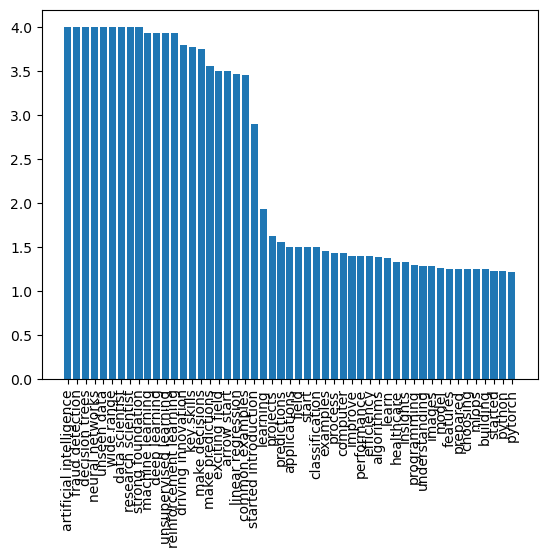

In [24]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [25]:
!pip install wordcloud

WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using matplotlib:

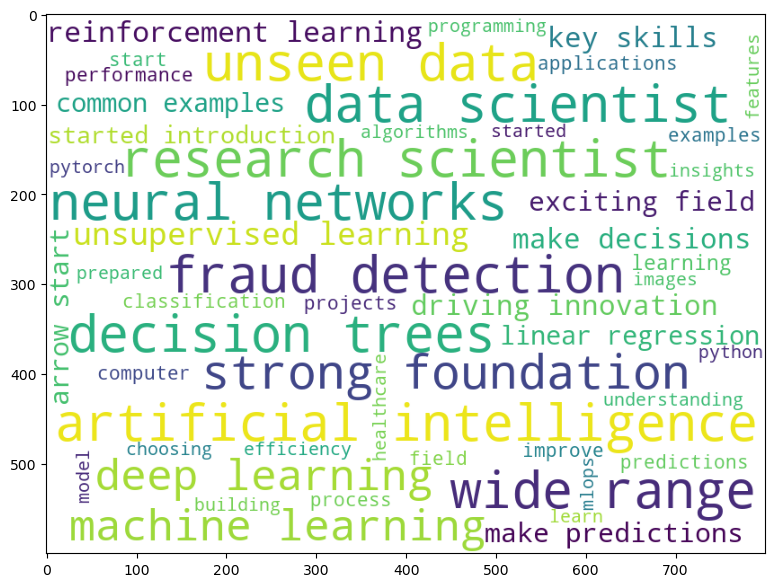

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to **WordCloud** - let's see if we are able to get similar result:

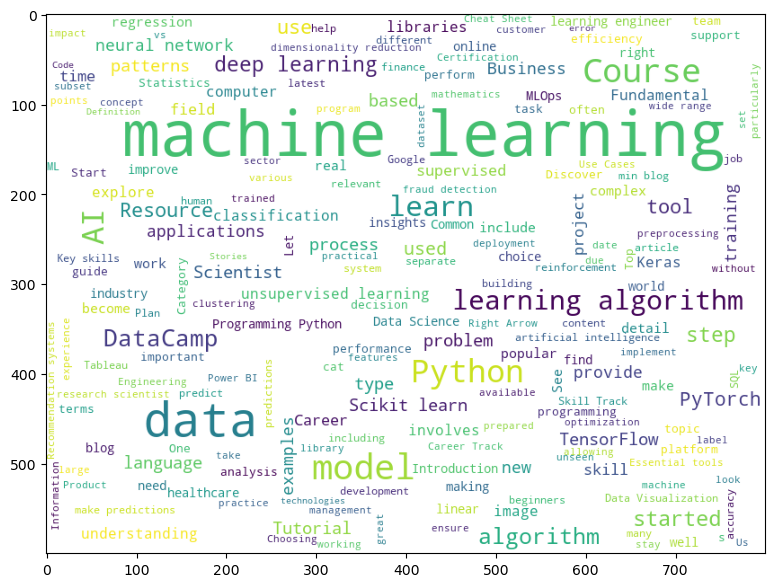

In [28]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [30]:
wc.generate(text).to_file('ds_wordcloud.png')